In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../artifacts/nearest-earth-objects(1910-2024).csv')  #import the dataset

In [3]:
data.head()   # show the dataset 

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


## Data Preprocessing

In [4]:
data.shape  # count the total rows and columns

(338199, 9)

In [5]:
data.duplicated() # check the duplicated value

0         False
1         False
2         False
3         False
4         False
          ...  
338194    False
338195    False
338196    False
338197    False
338198    False
Length: 338199, dtype: bool

In [6]:
data.duplicated().sum()  # check the duplicate and get their sum

np.int64(0)

In [34]:
data.isnull().sum()  #check the null values and get the total 

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [129]:
# Remove rows where a specific column has null values
specific_columns = ["absolute_magnitude", "estimated_diameter_min", "estimated_diameter_max" ] # columns to check
cleaned_data = data.dropna(subset=specific_columns)
print(f"Remaining number of rows after removing non values: {cleaned_data.shape[0]}")


Remaining number of rows after removing non values: 338171


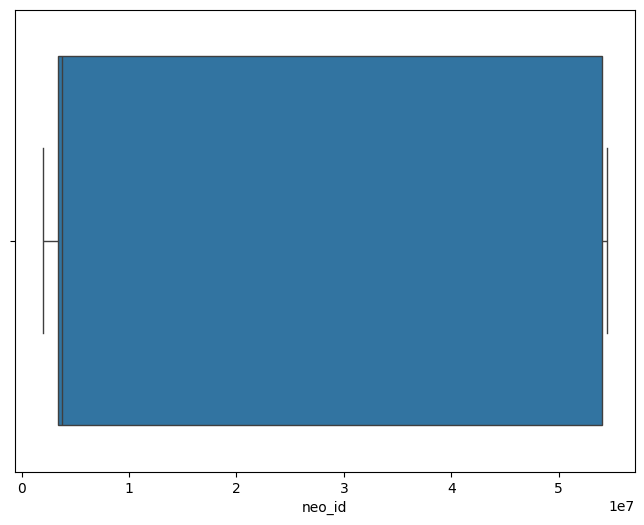

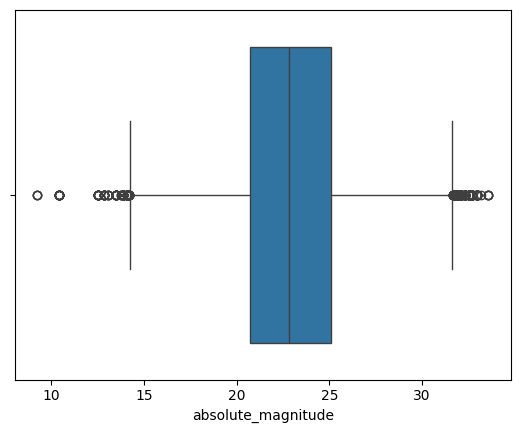

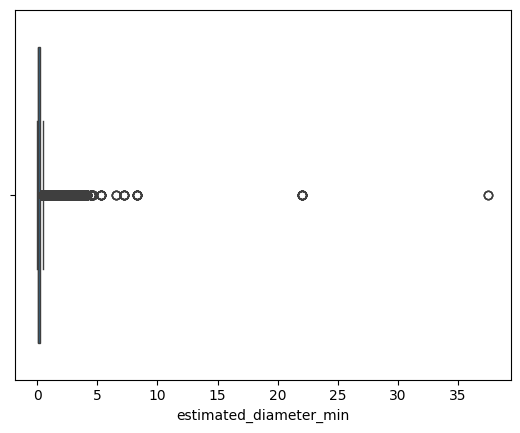

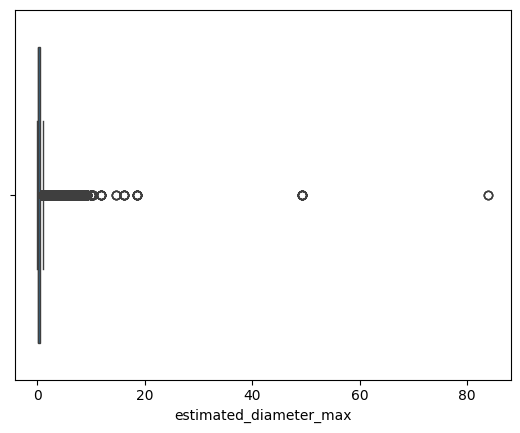

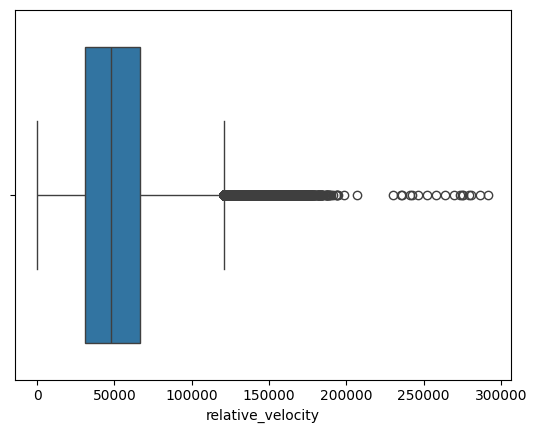

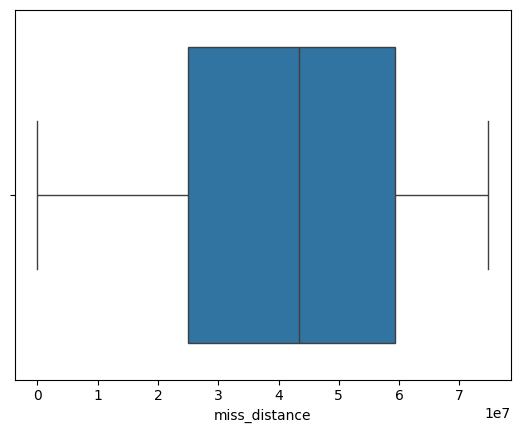

In [131]:
import seaborn as sns
# Plot boxplots for each column
plt.figure(figsize=(8, 6))
for i in cleaned_data.select_dtypes(include="number").columns:
    sns.boxplot(data=cleaned_data,x=i)
    plt.show()



In [136]:
# Define a function to remove outliers based on IQR
def remove_outliers(df):
    df = cleaned_data
    for column in df.select_dtypes(include='number').columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile range

        # Define the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the data to remove outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# Remove outliers from the dataset
cleaned_outliers_data = remove_outliers(cleaned_data)

# Print the shape of the cleaned data to verify the rows removed
print(f"Remaining rows after removing outliers: {cleaned_outliers_data.shape[0]}")


Remaining rows after removing outliers: 295768


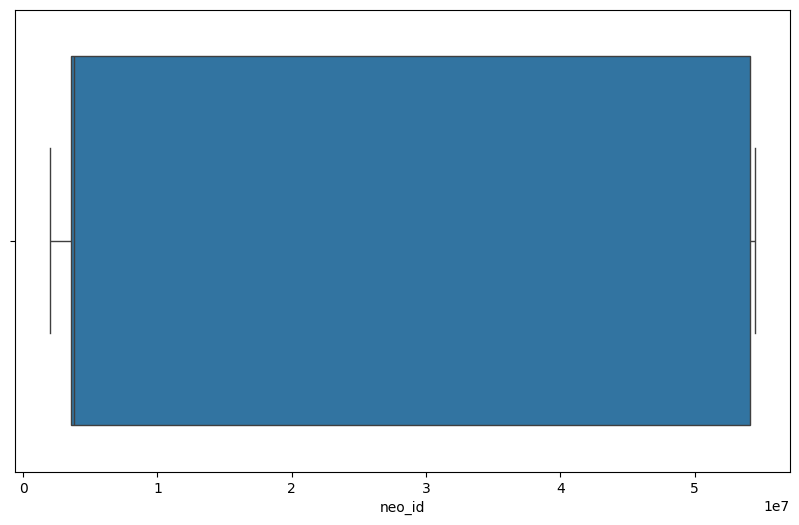

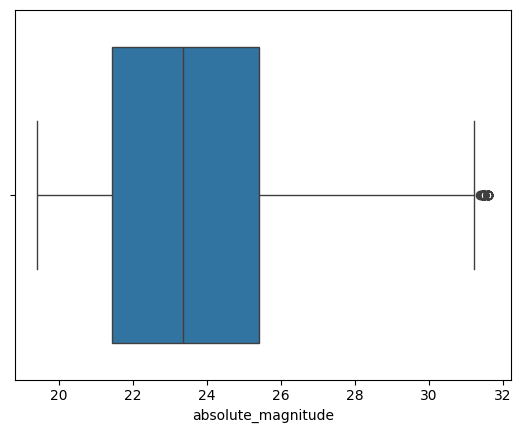

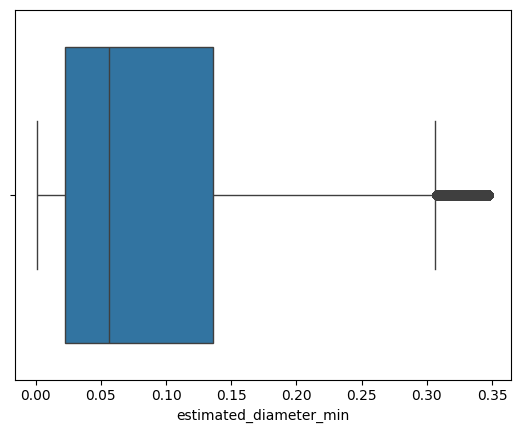

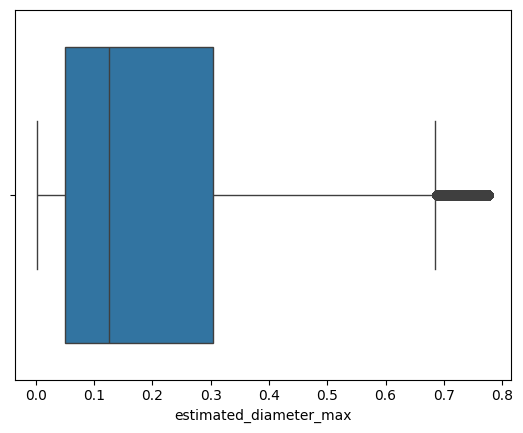

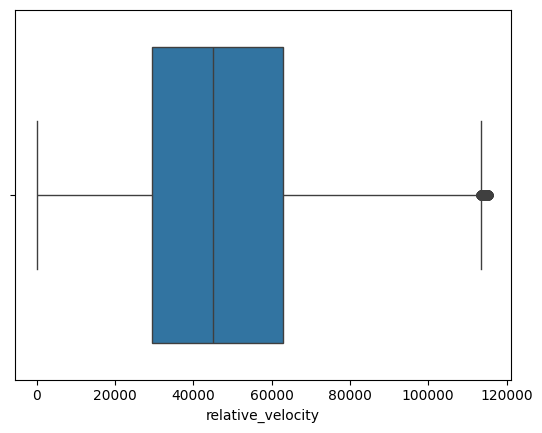

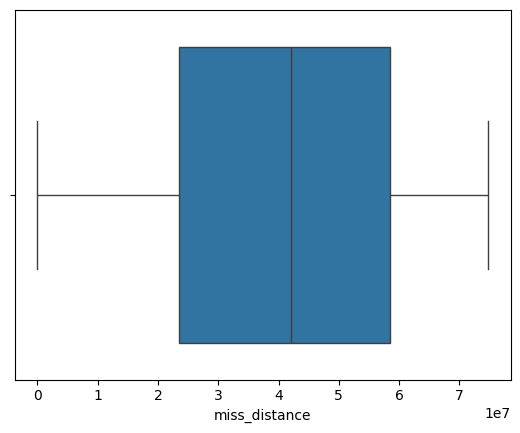

In [135]:
import seaborn as sns
# Plot boxplots for each column
plt.figure(figsize=(10, 6))
for i in cleaned_outliers_data.select_dtypes(include="number").columns:
    sns.boxplot(data=cleaned_outliers_data,x=i)
    plt.show()


In [137]:
# Save the cleaned dataset to a new CSV file
cleaned_outliers_data.to_csv('../artifacts/cleaned_data_without_outliers.csv', index=False)

# Confirm that the file has been saved
print("Cleaned data saved to 'cleaned_data_without_outliers.csv'")


Cleaned data saved to 'cleaned_data_without_outliers.csv'


In [138]:
cdata = pd.read_csv('../artifacts/cleaned_data_without_outliers.csv')  #import the dataset

In [139]:
# Count "True" in the 'is_hazardous' column
true_count = cdata['is_hazardous'].sum()

# Filter the DataFrame for rows where 'is_hazardous' is True
true_values = cdata[cdata['is_hazardous'] == True]

# Print the result
print(f"Number of 'True' in 'is_hazardous' column: {true_count}")

Number of 'True' in 'is_hazardous' column: 32189


In [140]:
# Filter the DataFrame for rows where 'is_hazardous' is False
false_values = cdata[cdata['is_hazardous'] == False]

# Randomly sample the same number of False values as the count of True values
false_sample = false_values.sample(n=true_count, random_state=42)

print(f"Number of sampled FALSE values: {len(false_sample)}")

Number of sampled FALSE values: 32189


In [141]:
# Combine True values and sampled False values into one DataFrame
combined_data = pd.concat([true_values, false_sample])

# Save the combined DataFrame to a CSV file
combined_file_path = '../artifacts/combined_true_false_values.csv'
combined_data.to_csv(combined_file_path, index=False)

print(f"Combined file saved successfully as '{combined_file_path}'.")



Combined file saved successfully as '../artifacts/combined_true_false_values.csv'.


In [142]:
# Read the saved file to display its content
df = pd.read_csv('../artifacts/combined_true_false_values.csv')


In [143]:
# Perform the train-test split
train_data, test_data = train_test_split(
    combined_data, 
    test_size=0.2,  # 20% of the data goes to the test set
    random_state=42,  # For reproducibility
    stratify=combined_data['is_hazardous']  # Ensure balanced distribution
)

# Save the training and testing sets to separate files
train_data.to_csv('../artifacts/train_data.csv', index=False)
test_data.to_csv('../artifacts/test_data.csv', index=False)

print(f"Training set size: {len(train_data)}")
print(f"Testing set size: {len(test_data)}")


Training set size: 51502
Testing set size: 12876


In [144]:
# Separate features (X) and target (y) for training set
X_train = train_data.drop(columns=['name','orbiting_body','is_hazardous'])  # Drop target column to get features
y_train = train_data['is_hazardous']                # Target column

# Separate features (X) and target (y) for test set
X_test = test_data.drop(columns=['name','orbiting_body','is_hazardous'])  # Drop target column to get features
y_test = test_data['is_hazardous']                # Target column


In [145]:
from sklearn.preprocessing import StandardScaler

# Feature scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled = scaler.transform(X_test[numerical_columns])


In [146]:
print(f"X_train shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (51502, 6)
y_train shape: (51502,)


## Model Initialize


In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize models
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)


In [148]:
print(X_train.isnull().sum())

neo_id                    0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
relative_velocity         0
miss_distance             0
dtype: int64


In [149]:
# Train Logistic Regression
logistic_model.fit(X_train_scaled, y_train)

# Train Random Forest
random_forest_model.fit(X_train, y_train)  # No scaling needed


RandomForestClassifier(random_state=42)

In [150]:
# Predict using Logistic Regression on training data
y_pred_logistic_train = logistic_model.predict(X_train_scaled)  # Use scaled data if required

# Predict using Random Forest on training data
y_pred_rf_train = random_forest_model.predict(X_train)

# Evaluate Logistic Regression on training data
print("Logistic Regression Performance on Training Data:")
print(classification_report(y_train, y_pred_logistic_train))
print("Accuracy:", accuracy_score(y_train, y_pred_logistic_train))

# Evaluate Random Forest on training data
print("Random Forest Performance on Training Data:")
print(classification_report(y_train, y_pred_rf_train))
print("Accuracy:", accuracy_score(y_train, y_pred_rf_train))


Logistic Regression Performance on Training Data:
              precision    recall  f1-score   support

       False       0.95      0.75      0.84     25751
        True       0.79      0.96      0.87     25751

    accuracy                           0.85     51502
   macro avg       0.87      0.85      0.85     51502
weighted avg       0.87      0.85      0.85     51502

Accuracy: 0.8533066677022252
Random Forest Performance on Training Data:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     25751
        True       1.00      1.00      1.00     25751

    accuracy                           1.00     51502
   macro avg       1.00      1.00      1.00     51502
weighted avg       1.00      1.00      1.00     51502

Accuracy: 0.9999805832783193


In [151]:
from sklearn.metrics import accuracy_score, classification_report

# Predict using Logistic Regression
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Predict using Random Forest
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))

# Evaluate Random Forest
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Logistic Regression Performance:
              precision    recall  f1-score   support

       False       0.95      0.76      0.85      6438
        True       0.80      0.96      0.87      6438

    accuracy                           0.86     12876
   macro avg       0.88      0.86      0.86     12876
weighted avg       0.88      0.86      0.86     12876

Accuracy: 0.8612146629388009
Random Forest Performance:
              precision    recall  f1-score   support

       False       0.98      0.91      0.95      6438
        True       0.92      0.98      0.95      6438

    accuracy                           0.95     12876
   macro avg       0.95      0.95      0.95     12876
weighted avg       0.95      0.95      0.95     12876

Accuracy: 0.9488195091643368


In [152]:
import joblib

# Save train models for future use
joblib.dump(logistic_model, 'logistic_model.pkl')
joblib.dump(random_forest_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [105]:
# Load the model
loaded_model = joblib.load('logistic_model.pkl')

# Predict
new_predictions = loaded_model.predict(new_data_scaled)


NameError: name 'new_data_scaled' is not defined